# Full Metal Bracket
## Exoplanets Final Project
#### by Savannah Gramze

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns

In [2]:
table3 = np.loadtxt('table3_fv05.txt', dtype='str')
table8 = np.loadtxt('table8_vf05.txt', dtype='str')

In [45]:
print(table8[0])
print(table3[0])

['0' 'Sun' '5770' '4.44' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '1.7'
 '-0.1' '1.80' '1.09' '6' '0' '0']
['HD142' 'P']


In [327]:
i = 0
stars = []
FeH = []
detect = []
index = []
for s in table3:
    for obj in table8:
        if s[0] == obj[1]:
            stars.append(s[0])
            FeH.append(obj[8])
            detect.append(s[1])
            index.append(i)
            i += 1
FeH = np.array(FeH).astype('float')
print(i)

842


1. To orient yourself to this data
set, overplot the histograms of the metallicities of (1) stars with planets and (2) stars
without planets. Normalize these histograms so you can see them on the same scale.
By eye, is there an offset in the metal-rich direction for planet host stars?


In [328]:
bins = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]#bins
print(bins)
#[-0.44  -0.341 -0.242 -0.143 -0.044  0.055  0.154  0.253  0.352  0.451  0.55 ]


[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]


Text(0.5, 1.0, 'All Stars Put into Metallicity Bins')

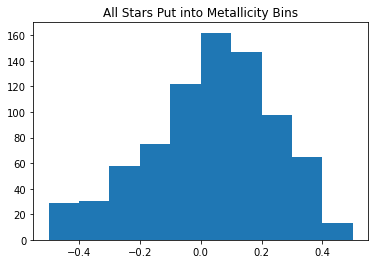

In [381]:
np.histogram(FeH)
plt.hist(FeH, bins=bins)
yes = []
no = []
for i in index:
    if detect[i] == 'P':
        yes.append(FeH[i])
    elif detect[i] == 'S':
        no.append(FeH[i])
plt.title('All Stars Put into Metallicity Bins')

Text(0.5, 1.0, 'Normalized Comparison of Stars with an without Planets')

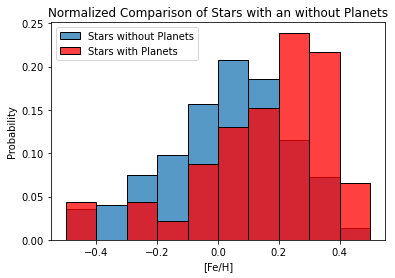

In [385]:
#n, bins, patches = 
#plt.hist(no, label='Stars without Planets', bins=bins, density=True, alpha=0.5, stacked=True)
#plt.hist(yes, label='Stars with Planets', bins=bins, density=True, alpha=0.7, stacked=True)

sns.histplot(no, bins=bins, stat='probability', label='Stars without Planets')
sns.histplot(yes, bins=bins, stat='probability', color='red', label='Stars with Planets')


plt.legend()
plt.xlabel('[Fe/H]')
plt.title('Normalized Comparison of Stars with an without Planets')

Answer to 1: There is a noticable shift towards more metal rich stars for those with planet detections. It seems like planet host stars tend to be more metal rich on average than metal poor stars.

2. 

| Star # | Star has Planet | Probability $p(D_i\|f)$ | Metallicity | prior $p(f)$     |
|--------|-----------------|-------------------------|-------------|------------------|
| $1$    | $1$             | $f([Fe/H]_1)$           | $[Fe/H]_1$  | $p(f([Fe/H]_1))$ |
| $2$    | $1$             | $f([Fe/H]_2)$           | $[Fe/H]_2$  | $p(f([Fe/H]_2))$ |
| $3$    | $0$             | $1-f([Fe/H]_3)$         | $[Fe/H]_3$  | $p(f([Fe/H]_3))$ |
| $4$    | $0$             | $1-f([Fe/H]_4)$         | $[Fe/H]_4$  | $p(f([Fe/H]_4))$ |


$p(${D}|$f) = f([Fe/H]_1) \times f([Fe/H]_2) \times (1-f([Fe/H]_3)) \times (1-f([Fe/H]_4))$



3. Rewrite $p(${D}|$f)$ as a function of $\alpha$, $\beta$, and the four ${[Fe/H]_i}$.

$f([Fe/H])$ = $\alpha \cdot 10^{\beta [Fe/H]}$

$p(${D}|$f)$ = $\alpha \cdot 10^{\beta [Fe/H]_1} \times \alpha \cdot 10^{\beta [Fe/H]_2} \times (1-\alpha \cdot 10^{\beta [Fe/H]_3}) \times (1-\alpha \cdot 10^{\beta [Fe/H]_4})$

4. For N stars:

$p(${D}|$f)$ = $(\alpha \cdot 10^{\beta [Fe/H]})^x \times (1-\alpha \cdot 10^{\beta [Fe/H]})^{N-x}$

Where $x$ is the number of stars with planets and N is the total number of stars.



In [386]:
def fun(alpha, beta, metallicity):
    return alpha * 10 ** (beta * metallicity)

def like(alpha, beta, metals, detect):
    li = 1
    for i in range(len(metals)):
        if detect[i] == 'P':
            li *= fun(alpha, beta, metals[i])
        elif detect[i] == 'S':
            li *= (1-fun(alpha, beta, metals[i]))
    return li

<AxesSubplot:xlabel='[Fe/H]', ylabel='Probability'>

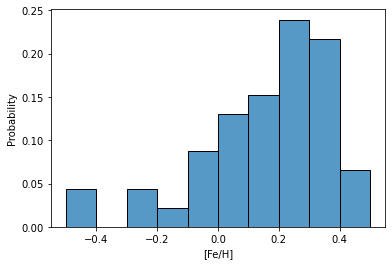

In [387]:
plt.xlabel('[Fe/H]')
sns.histplot(yes, label='Stars with Planets', bins=bins, stat='probability')
#plt.ylabel('$f([Fe/H])$')

In [388]:
def find_likelihood(alpha, beta, FeH, detect):
    likelihood = np.zeros((len(alpha), len(beta)))

    for a in range(len(alpha)):
        for b in range(len(beta)):
            likelihood[a, b] = like(alpha[a], beta[b], FeH, detect)
            
    return likelihood
        
alpha = np.linspace(0.0, 0.1, 50)#[0, .01, .02, .03, .04, .05, .06]
beta = np.linspace(0.0, 3.0, 50)#[0, .1, .2, .3, .4, .5, .6] 

likelihood = find_likelihood(alpha, beta, FeH, detect)

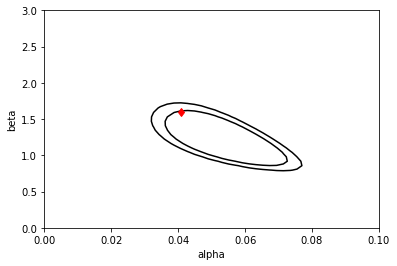

0.04081632653061225 1.5918367346938775


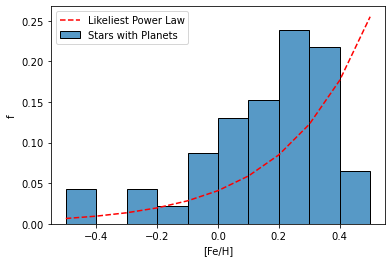

In [395]:
fig, ax = plt.subplots()

mn = np.unravel_index(likelihood.argmax(), likelihood.shape)
manA = mn[0]
manB = mn[1]

#levels = np.linspace(np.amin(likelihood), np.amax(likelihood), num=10)
std = np.std(likelihood)
contours = plt.contour(alpha, beta, likelihood, levels=[std, 2*std], colors='black')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.plot(alpha[manA], beta[manB],'rd')

plt.show()

'''fig,ax = plt.subplots()
plt.imshow(likelihood, interpolation='none')
ax.invert_yaxis()
plt.xlabel('alpha')
plt.ylabel('beta')
plt.show()'''



plt.xlabel('[Fe/H]')
plt.ylabel('f')
hei = [h.get_height() for h in sns.histplot(yes, label='Stars with Planets', bins=bins, stat='probability').patches]
alp = alpha[manA]#0.05
bet = beta[manB]#1.25
plt.plot(bins,fun(alp, bet, np.array(bins)), 'r--',label='Likeliest Power Law')
#plt.text(0, 0,'$f([Fe/H])$ = $\alpha \cdot 10^{\beta [Fe/H]}$')
plt.legend()
print(alp,bet)


5. No, the 1$\sigma$ confidence interval for $p(${$D$}|$f)$ leaves out quite a few of the VF05 values on the histogram. $\Delta f$ is consistently less than zero.

In [399]:
print('Values of \u0394f:')
avgrich = 0.0
i=0
for b in range(len(hei)):
    delf = fun(alp, bet, bins[b]) - hei[b]
    print(delf)
    if bins[b] > 0.0:
        avgrich += hei[b]
        i+=1


Values of Δf:
-0.03694822527933641
0.009421048113644196
-0.029886275598855698
-0.002129628246631321
-0.05866539513706069
-0.0896184560780834
-0.0932871626186408
-0.1541730250804798
-0.09482109269201289
0.11161776454638896


6. (b) Given the values for $[\alpha, \beta]$, what is the relationship between the number of iron atoms in the primordial disk and the number of planets? How does the increased number of iron atoms $N_{Fe}$ scale with $N_{planet}$? Is there a 1:1 relationship where twice as much iron means twice as m

$[Fe/H] = log(N_{Fe} / N_H) - log(N_{Fe} / N_H)_{Sun}$

$P(planet) = 0.04 \times [\frac{N_{Fe} / N_H}{(N_{Fe} / N_H)_{Sun}}]^{1.59}$

Functional form of the probability of forming a planet from Fisher and Valenti 2005. The number of planets scales as $N_{planet} \propto N_{Fe}^{1.59}$. The relationship between the two is not 1:1, so more iron means many more planets. For instance, twice as much iron would create 3 times as many planets going by this relationship. 

6. (a) Stars with $[Fe/H] < 0.0$ are metal poor, and have a completeness $C$, where $C < 1.0$. All metal rich stars have $C = 1.0$. Why would this allow for a flatter metallicity-planet occurance relationship? What does $C$ need to be for $\beta$ to be zero at the $2\sigma$ level?

If the completeness was less for metal poor stars due to the difficulty in applying the radial velocity method, then the metallicity-planet occurence relationship would be flatter as there would be more planets that we are not detecting around metal poor stars. 

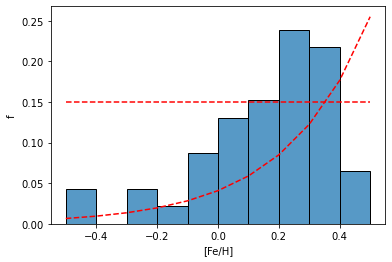

In [343]:
plt.xlabel('[Fe/H]')
plt.ylabel('f')
hei = [h.get_height() for h in sns.histplot(yes, label='Stars with Planets', bins=bins, stat='probability').patches]
alp = alpha[manA]#0.05
bet = beta[manB]#1.25
plt.plot(bins,fun(alp, bet, np.array(bins)), 'r--')
plt.plot(bins,fun(0.15, 0, np.array(bins)), 'r--')